In [261]:
import pandas as pd
import numpy as np

In [262]:
url="https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
table_name = "Коефіцієнт народжуваності в регіонах України"
data = pd.read_html(url, match=table_name)
df= data[0]

In [263]:
#Вивести перші рядки таблиці за допомогою методу head
print("Перші рядки таблиці:")
print(df.head())

Перші рядки таблиці:
             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [264]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
print("\nКількість рядків та стовпців у датафреймі:")
print(df.shape)


Кількість рядків та стовпців у датафреймі:
(28, 9)


In [265]:
#Замініть у таблиці значення "—" на значення NaN
df.replace("—", np.nan, inplace=True)
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82  NaN


In [266]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
print("\nТипи стовпців:")
print(df[df.columns[1:]].dtypes)


Типи стовпців:
1950    float64
1960    float64
1970    float64
1990      int64
2000      int64
2012      int64
2014     object
2019     object
dtype: object


In [267]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [268]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
print("\nЧастка пропусків в кожній колонці:")
df.isnull().sum()


Частка пропусків в кожній колонці:


Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [269]:
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0              Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2         Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4          Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN


In [270]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
df.drop(df.tail(1).index,inplace=True)
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN


In [271]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.0,192.0,142.0,124,84,112,109.00,76.000000
2,Волинська,247.0,250.0,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.00,71.000000
4,Донецька,271.0,214.0,140.0,109,61,98,82.00,80.173913


In [272]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
print("\nРегіони з рівнем народжуваності у 2019 році вищим за середній по Україні:")
df[ df['2019'] >= df['2019'].mean()][["Регіон", '2019']].sort_values(by='2019')


Регіони з рівнем народжуваності у 2019 році вищим за середній по Україні:


,Регіон,2019
20,Херсонська,81.0
12,Львівська,87.0
8,Івано-Франківська,88.0
14,Одеська,88.0
23,Чернівецька,92.0
2,Волинська,101.0
6,Закарпатська,104.0
16,Рівненська,107.0
25,Київ,110.0


In [273]:
#У якому регіоні була найвища народжуваність у 2014 році?
df["2014"].idxmax()
df.iloc[df['2014'].idxmax()][["Регіон"]]

Регіон    Рівненська
Name: 16, dtype: object

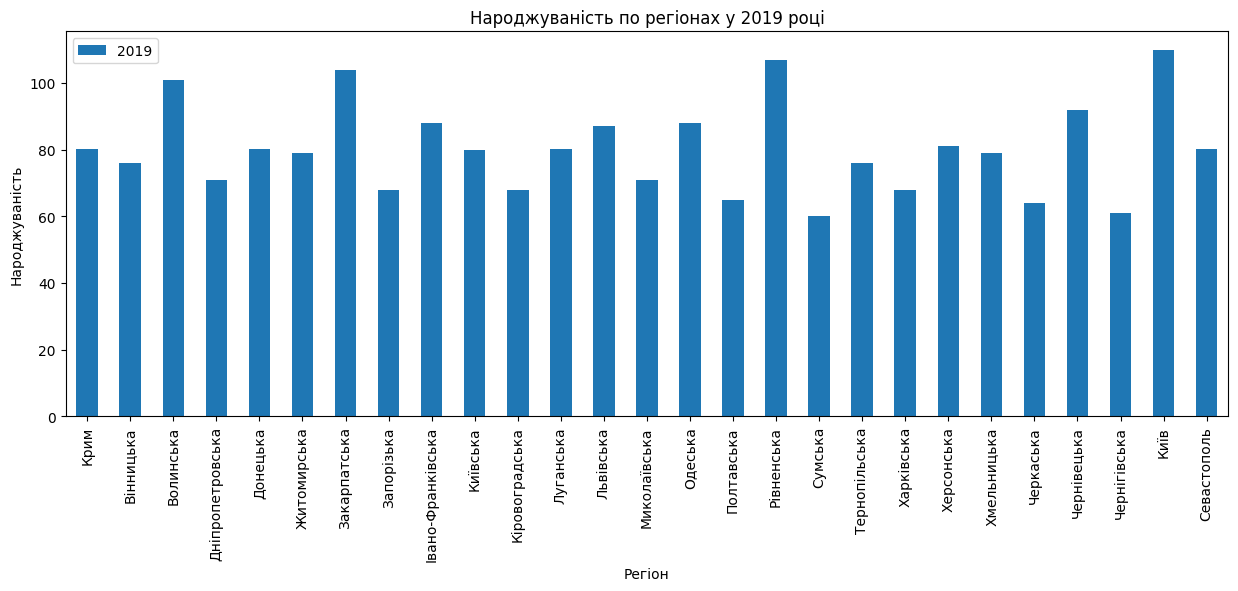

In [274]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt

pl = df[["Регіон",'2019']].plot(figsize=(15,5),kind="bar", x="Регіон", ylabel="Народжуваність", title="Народжуваність по регіонах у 2019 році")
plt.show()

In [275]:
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.00,206.000000,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.00,192.000000,142.0,124,84,112,109.00,76.000000
2,Волинська,247.00,250.000000,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.00,204.000000,151.0,123,71,112,111.00,71.000000
4,Донецька,271.00,214.000000,140.0,109,61,98,82.00,80.173913
5,Житомирська,261.00,223.000000,159.0,129,89,122,120.00,79.000000
6,Закарпатська,314.00,273.000000,207.0,168,115,151,146.00,104.000000
7,Запорізька,219.00,197.000000,150.0,124,71,106,106.00,68.000000
8,Івано-Франківська,243.00,248.000000,182.0,155,103,124,122.00,88.000000
9,Київська,204.00,189.000000,156.0,123,73,122,121.00,80.000000


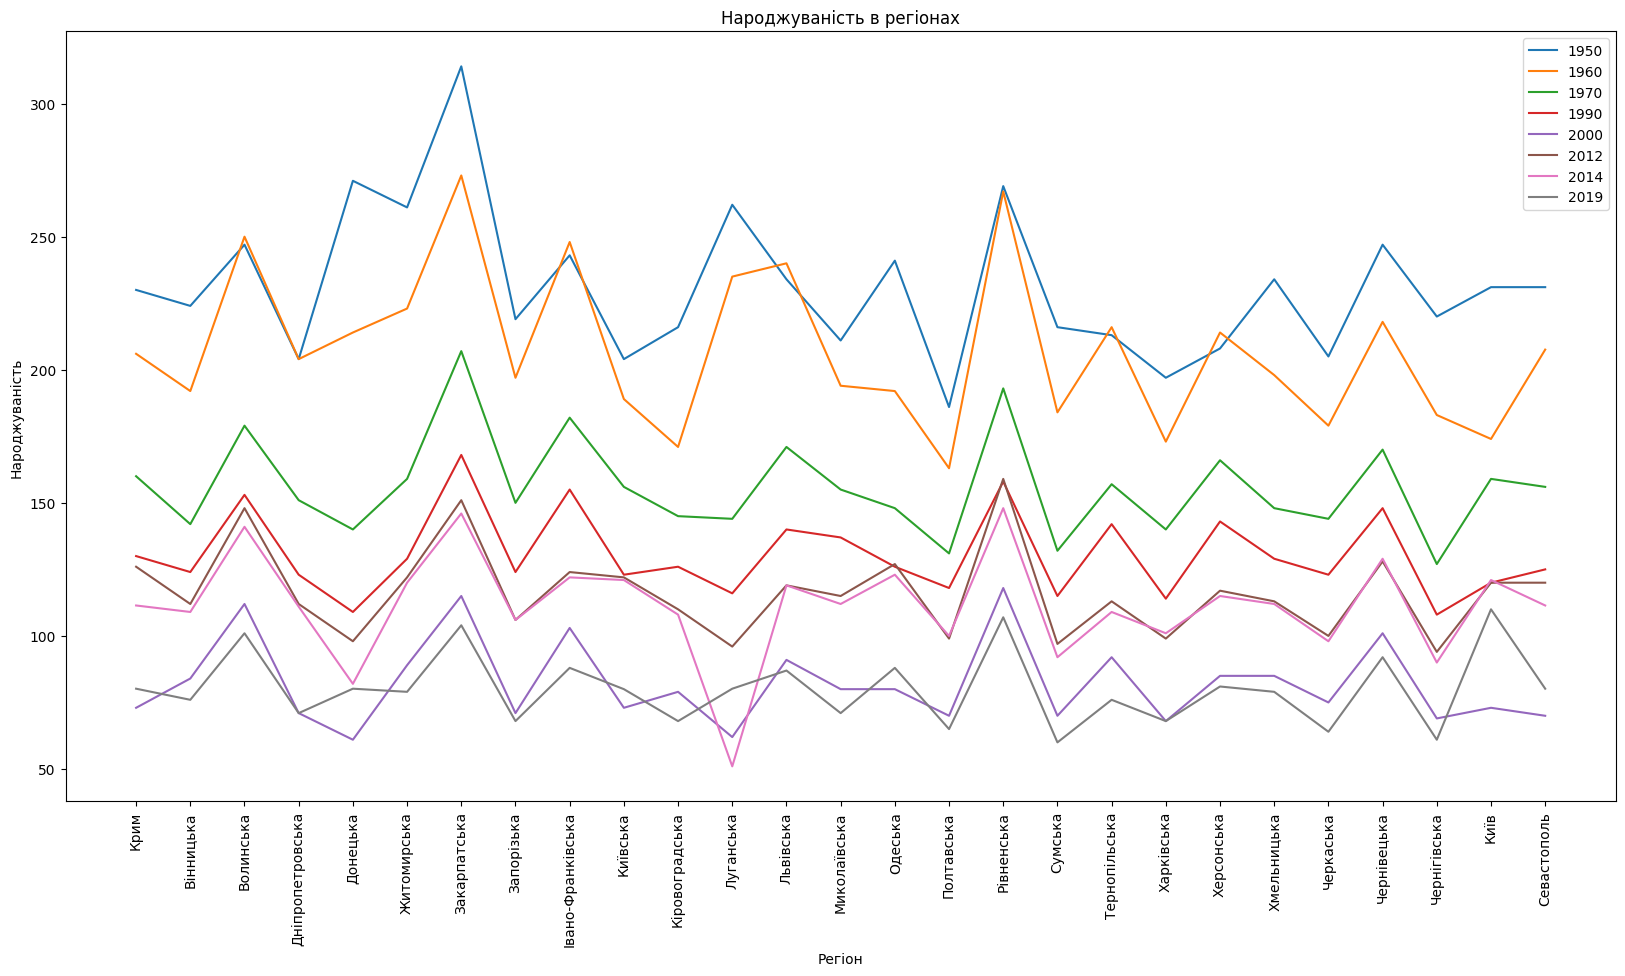

In [276]:
plt.figure(figsize=(20,10))
ax=plt.plot(df["Регіон"],df[df.columns[1:]], label=df.columns[1:])
plt.xticks(rotation=90)

plt.xlabel("Регіон")

plt.ylabel("Народжуваність")
plt.title("Народжуваність в регіонах", fontsize=12)
plt.legend()
plt.show()


In [277]:
crimea = df.iloc[0]
crimea

Регіон         Крим
1950          230.0
1960          206.0
1970          160.0
1990            130
2000             73
2012            126
2014         111.44
2019      80.173913
Name: 0, dtype: object

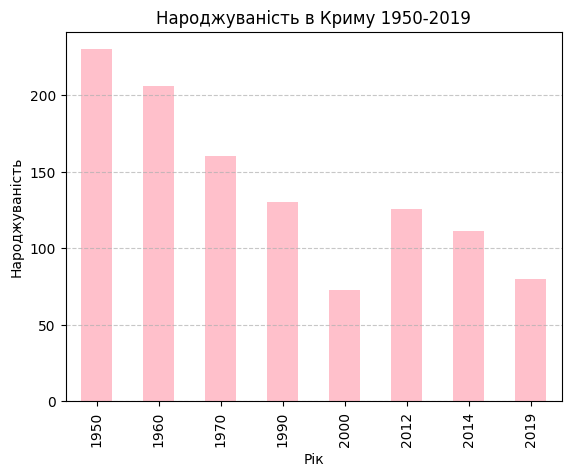

In [278]:
crimea = df.iloc[0]
data = crimea[1:]
data.plot(kind = 'bar', color = 'pink')
plt.xlabel("Рік")
plt.ylabel("Народжуваність")
plt.title("Народжуваність в Криму 1950-2019", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

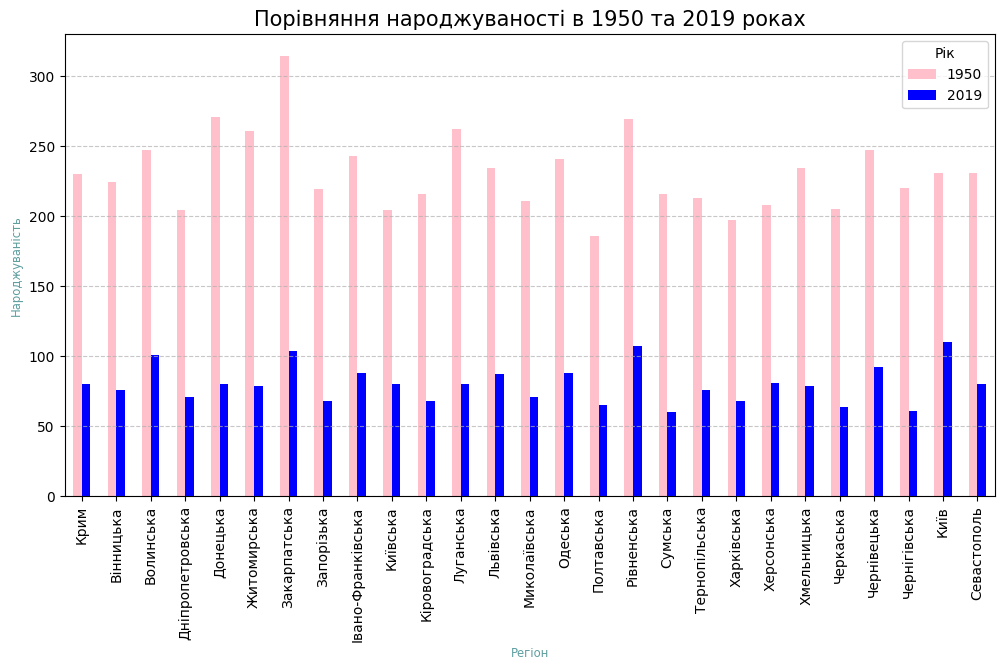

In [279]:

selected_columns = ['Регіон', '1950', '2019']
df_selected = df[selected_columns]

df_selected.set_index('Регіон', inplace=True)

df_selected.plot(kind='bar', figsize=(12, 6), color = ['pink', 'blue'])
plt.legend(title='Рік')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Регіон", fontsize="small", color="cadetblue")
plt.ylabel("Народжуваність", fontsize="small", color="cadetblue")
plt.title("Порівняння народжуваності в 1950 та 2019 роках", fontsize=15)
plt.show()


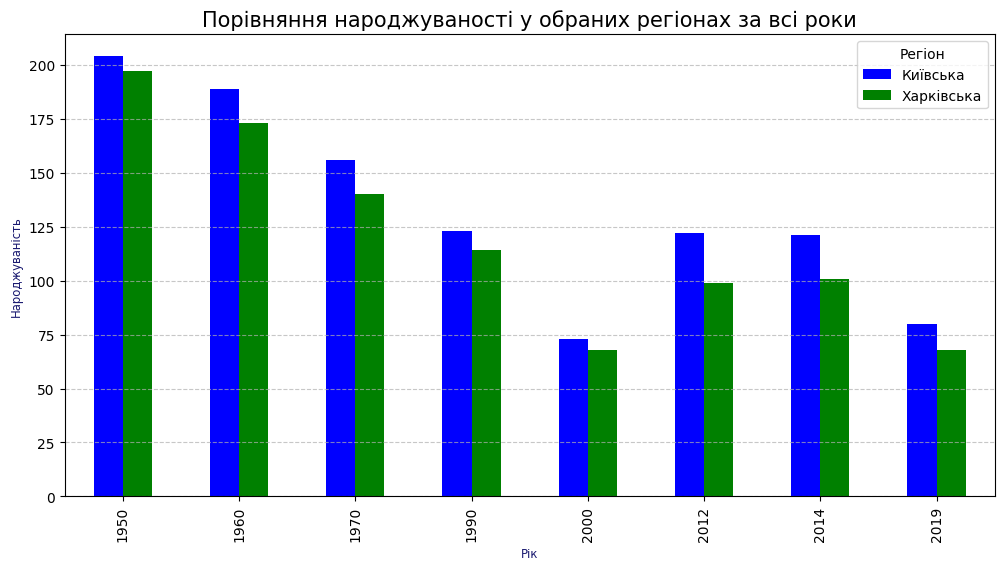

In [280]:
selected_regions = ['Київська', 'Харківська']
df_comparison = df.set_index('Регіон').loc[selected_regions]

df_comparison.T.plot(kind='bar', figsize=(12, 6), color = ['blue', 'green'])
plt.legend(title='Регіон')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Рік", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Порівняння народжуваності у обраних регіонах за всі роки", fontsize=15)
plt.show()